In [85]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from PIL import Image
import shutil
import pandas as pd
import cv2
from IPython.display import clear_output
import os
from sklearn import preprocessing
import matplotlib.patches as patches
import time
from termcolor import colored

# Create Dataset

In [86]:
Haak1_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_true_annot.csv')
Haak1_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_object_annot.csv')
Haak1_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight1/Haak1_ano_land_annot.csv')

Haak3_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_true_annot.csv')
Haak3_anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_object_annot.csv')
Haak3_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Haak3_ano_land_annot.csv')

Danilo_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_true_annot.csv')
Danilo_anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Danilo_ano_land_annot.csv')
Empty_df = pd.read_csv(r'/Volumes/Samsung_T5/Danilo_data/IR/Empty.csv')

In [87]:
# Haak - Flight 1
Haak1_true_train       = Haak1_true_df.sample(frac = 0.7, random_state = 100)
Haak1_true_test        = Haak1_true_df.drop(Haak1_true_train.index)

Haak1_ano_object_train = Haak1_anomalies_object_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_object_test  = Haak1_anomalies_object_df.drop(Haak1_ano_object_train.index)
Haak1_ano_object       = Haak1_anomalies_object_df

Haak1_ano_land_train   = Haak1_anomalies_land_df.sample(frac = 0.7, random_state = 100)
Haak1_ano_land_test    = Haak1_anomalies_land_df.drop(Haak1_ano_land_train.index)
Haak1_ano_land         = Haak1_anomalies_land_df
 
# Haak - Flight 1
Haak3_true             = Haak3_true_df
Haak3_ano_object       = Haak3_anomalies_object_df
Haak3_ano_land         = Haak3_anomalies_land_df

# Danilo
Danilo_true            = Danilo_true_df
Danilo_ano_land        = Danilo_anomalies_land_df
empty                  = Empty_df


'''
Haak1_true_train | Haak1_true_test
Haak1_ano_object
Haak1_ano_land

Haak3_true 
Haak3_ano_object 
Haak3_ano_land 

Danilo_true
empty
Danilo_ano_land
'''

'\nHaak1_true_train | Haak1_true_test\nHaak1_ano_object\nHaak1_ano_land\n\nHaak3_true \nHaak3_ano_object \nHaak3_ano_land \n\nDanilo_true\nempty\nDanilo_ano_land\n'

# Various Scripts

In [88]:
anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_object.csv')
anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_land.csv')
anomalies_all_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_all.csv')
anomalies_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/True.csv')

directory = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_full-norm/' # 14-bit

true_imgs = []
ano_object_imgs = []
ano_land_imgs = []

files = len(os.listdir(directory))
loops = files

for i, file in enumerate(os.listdir(directory)[:loops]):
    print(str(i) + '/' + str(files), end='\r')

    file_png = file.split('.')[0][1:] + '.png'
    isAnomObject = anomalies_object_df['Anomalies_object'].str.contains(file_png).sum()
    isAnomLand   = anomalies_land_df['Anomalies_land'].str.contains(file_png).sum()
    isTrue       = anomalies_true_df['True'].str.contains(file_png).sum()
    
    '''
    if isTrue:
        img = np.array(Image.open(os.path.join(directory, file)))
        true_imgs = [*true_imgs, img]
    
    '''
    if isAnomObject:
        img = np.array(Image.open(os.path.join(directory, file)))
        ano_object_imgs = [*ano_object_imgs, img]
        
    if isAnomLand:
        img = np.array(Image.open(os.path.join(directory, file)))
        ano_land_imgs = [*ano_land_imgs, img]
     
        
true_imgs       = np.array(true_imgs)
ano_object_imgs = np.array(ano_object_imgs)
ano_land_imgs   = np.array(ano_land_imgs)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_full-norm/'

<ipython-input-34-9536cd0fde9b>:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours_areathrsh = np.array(contours_areathrsh)


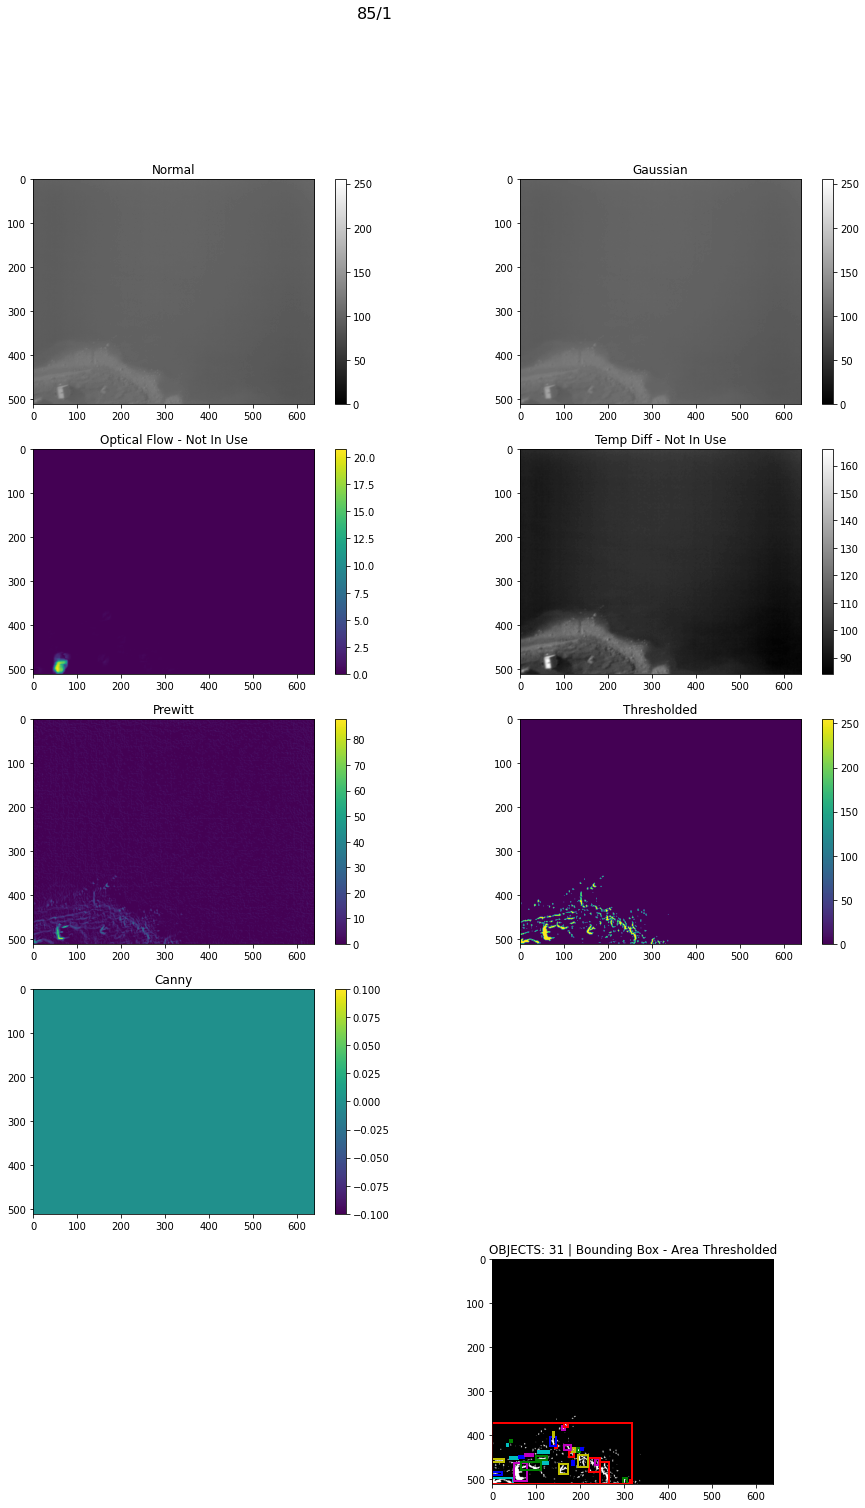

In [34]:
%matplotlib inline
import cv2
from IPython.display import clear_output
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image
import shutil
import pandas as pd
import cv2
from sklearn import preprocessing
import matplotlib.patches as patches

anomalies_object_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_object.csv')
anomalies_land_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_land.csv')
anomalies_all_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/Anomalies_all.csv')
anomalies_true_df = pd.read_csv(r'/Volumes/Samsung_T5/Haak_data/Flight3/True.csv')

def covering_rectangle_from_square_boxes(boxes):
    x_left = np.min(boxes[:,0])
    width = np.max(boxes[:,0] + boxes[:,2] - x_left)
    y_top = np.min(boxes[:,1])
    height = np.max(boxes[:,1] + boxes[:,3] - y_top)
    
    return x_left, y_top, width, height


def plot_results(img, img_gaussian, opt_flow, img_temp_diff, img_prewitt_z, img_prewitt_z_thrsh, canny, title):
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(16,24))

    plt.subplot(5, 2, 1)
    plt.imshow(img, vmin=0, vmax=255, cmap='gray')
    plt.colorbar(fraction=0.035)
    plt.title('Normal', fontsize=12)

    plt.subplot(5, 2, 2)
    plt.imshow(img_gaussian, vmin=0, vmax=255, cmap='gray')
    plt.colorbar(fraction=0.035)
    plt.title('Gaussian', fontsize=12)
    
    plt.subplot(5, 2, 3)
    plt.imshow(opt_flow)
    plt.colorbar(fraction=0.035)
    plt.title('Optical Flow - Not In Use', fontsize=12)
    
    plt.subplot(5, 2, 4)
    plt.imshow(img_temp_diff, cmap='gray')
    plt.colorbar(fraction=0.035)
    plt.title('Temp Diff - Not In Use', fontsize=12)

    plt.subplot(5, 2, 5)
    plt.imshow(img_prewitt_z)
    plt.colorbar(fraction=0.035)
    plt.title('Prewitt', fontsize=12)

    plt.subplot(5, 2, 6)
    plt.imshow(img_prewitt_z_thrsh)
    plt.colorbar(fraction=0.035)
    plt.title('Thresholded', fontsize=12)
    
    plt.subplot(5, 2, 7)
    plt.imshow(canny)
    plt.colorbar(fraction=0.035)
    plt.title('Canny', fontsize=12)

    ######### Bounding Box ######################################################
    mask = img_prewitt_z_thrsh
    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, 2)
    
    # Threshold by area
    area_threshold =  9

    contours_areathrsh = []
    contours_areathrsh_large = []
    for cnt in contours:
        if cv2.contourArea(cnt) > area_threshold:
            contours_areathrsh = [*contours_areathrsh, cnt]
            contours_areathrsh_large = [*contours_areathrsh_large, cnt[0]]
    contours_areathrsh = np.array(contours_areathrsh)
    contours_areathrsh_large = np.array(contours_areathrsh_large)

    
    # combine boxes thresholded
    boxes_thrsh = []
    for i, cnt in enumerate(contours_areathrsh):
        box = cv2.boundingRect(cnt)
        boxes_thrsh = [*boxes_thrsh, box]
    boxes_thrsh = np.array(boxes_thrsh)
    
    # Plot boxes - Area thresholded
    plt.subplot(5, 2, 10)
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    plt.imshow(mask, cmap='gray')
    ax = plt.gca()
    
    for i, box in enumerate(boxes_thrsh):
        # upper left
        x,y,w,h = box
        rect = patches.Rectangle((x,y), w,h, edgecolor=colors[i%6], fill=False, linewidth=2)
        ax.add_patch(rect)
        
    plt.title('OBJECTS: {} | Bounding Box - Area Thresholded'.format(len(boxes_thrsh)), fontsize=12)
        
    x, y, w, h = x_left, y_top, width, height = covering_rectangle_from_square_boxes(boxes_thrsh)
    rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=2)
    ax.add_patch(rect)
    
    '''
    # combine boxes
    boxes = []
    for i, cnt in enumerate(contours):
        box = cv2.boundingRect(cnt)
        boxes = [*boxes, box]
    boxes = np.array(boxes)
    
    # Plot boxes - Not Area thresholded
    plt.subplot(4, 2, 8)
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    for i, box in enumerate(boxes):
        # upper left
        x,y,w,h = box
        rect = patches.Rectangle((x,y), w,h, edgecolor=colors[i%6], fill=False, linewidth=2)

        plt.imshow(mask, cmap='gray')
        ax = plt.gca()
        ax.add_patch(rect)
        plt.title('OBJECTS: {} | Bounding Box - Not Area Thresholded'.format(len(boxes)), fontsize=12)
    '''
    ##############################################################################
    
    fig.suptitle(title, fontsize=16)
    plt.show()


kernelx = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
kernely = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])

directory = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_full-norm/'

files = len(os.listdir(directory))
loops = files
loops = 1

PCA_trainained_frames = 100
prev_img_gaussian = np.zeros((512, 640))

for i, file in enumerate(os.listdir(directory)[:86]):
    
    if i > 84:
        img = np.array(Image.open(os.path.join(directory, file)))

        file_png = file.split('.')[0][1:] + '.png'
        isAnomObject = anomalies_object_df['Anomalies_object'].str.contains(file_png).sum()
        isAnomLand   = anomalies_land_df['Anomalies_land'].str.contains(file_png).sum()
        isTrue       = anomalies_true_df['True'].str.contains(file_png).sum()

        # GAUSSIAN BLUR
        img_gaussian = cv2.GaussianBlur(img,(3,3),0)

        # --------------- Not In Use ---------------
        # OPTICAL FLOW   
        opt_flow = cv2.calcOpticalFlowFarneback(prev_img_gaussian, 
                                                 img_gaussian, 
                                                 None, 0.5, 3, 15, 3, 5, 1.2, 0)
        opt_flow = np.abs(opt_flow[:,:,0] + opt_flow[:,:,1])
        #opt_flow = cv2.threshold(img_temp_diff,1,opt_flow.max(),cv2.THRESH_BINARY)[1]

        # TEMP DIFF
        img_temp_diff = abs(img_gaussian - prev_img_gaussian)
        # ---------------            ---------------

        # UPDATE PREV GAUSSIAN
        prev_img_gaussian = img_gaussian

        # PREWITT
        img_prewitt_x = np.array(cv2.filter2D(img_gaussian, -1, kernelx))
        img_prewitt_y = np.array(cv2.filter2D(img_gaussian, -1, kernely))
        img_prewitt_z = np.array(img_prewitt_x + img_prewitt_y)
        
        # CANNY
        canny = cv2.Canny(img,0,250)

        # THRESHOLD
        img_prewitt_z_thrsh = cv2.threshold(img_prewitt_z,10,255,cv2.THRESH_BINARY)[1]

        title = '{}/{}'.format(i, loops)
        plot_results(img, img_gaussian, opt_flow, img_temp_diff, img_prewitt_z, img_prewitt_z_thrsh, canny, title)

# Evaluation Helper-functions

In [89]:
def covering_rectangle_from_square_boxes(boxes):
    output = np.array([])
    
    if len(boxes):
        x_left = np.min(boxes[:,0])
        width = np.max(boxes[:,0] + boxes[:,2] - x_left)
        y_top = np.min(boxes[:,1])
        height = np.max(boxes[:,1] + boxes[:,3] - y_top)
        
        output = np.array([[x_left, y_top, width, height]])

    return output

def intersection_info(box_i, box_j):
    # NMS
    x_left_i, y_upper_i, w_i, h_i = box_i
    x_right_i = x_left_i + w_i
    y_lower_i = y_upper_i + h_i
    area_i = w_i*h_i

    x_left_j, y_upper_j, w_j, h_j = box_j
    x_right_j = x_left_j + w_j
    y_lower_j = y_upper_j + h_j
    area_j = w_j*h_j

    x_left  = max(x_left_i, x_left_j)
    y_upper = max(y_upper_i, y_upper_j)

    x_right = min(x_right_i, x_right_j)
    y_lower = min(y_lower_i, y_lower_j)

    w_intersec = max(0, x_right - x_left)
    h_intersec = max(0, y_lower - y_upper)

    intersection_area = w_intersec*h_intersec
    union_area = area_i + area_j - intersection_area
    IoU = intersection_area / union_area
    
    return list([x_left, y_upper, w_intersec, h_intersec, intersection_area, union_area, IoU, area_i, area_j])

def compare_predictions_with_truth(pred_boxes, true_boxes):
    
    intersection_boxes = []
    match_found_pred = np.ones(len(pred_boxes))
    match_found_true = np.ones(len(true_boxes))
    
    for i, box_pred in enumerate(pred_boxes):
        for j, box_true in enumerate(true_boxes):
                     
            x_left, y_upper, w_intsc, h_intsc, A_intsc, A_union, IoU, A_pred, A_true  = intersection_info(box_pred, box_true)
            
            if IoU >= 0.1:
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
            
            elif (IoU >= 0.05) and ((A_intsc>=A_pred) or (A_intsc>=A_true)):
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
            
            
    intersection_boxes = np.array(intersection_boxes)
        
    false_positives = match_found_pred.sum()
    false_negatives = match_found_true.sum()
    true_positives  = len(match_found_true) - false_negatives
                
    return intersection_boxes, false_positives, false_negatives, true_positives

def boxes_from_mask(mask, area_threshold):
    
    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, 2)
    
    # Threshold by area
    contours_areathrsh = []
    for cnt in contours:
        if cv2.contourArea(cnt) > area_threshold:
            contours_areathrsh = [*contours_areathrsh, cnt]
    contours_areathrsh = np.array(contours_areathrsh)
    
    # combine boxes thresholded
    boxes = []
    for i, cnt in enumerate(contours_areathrsh):
        box = cv2.boundingRect(cnt)
        boxes = [*boxes, box]
    boxes = np.array(boxes)

    return boxes

def plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title):
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(21,10))

    # Plot boxes - Area thresholded
    plt.subplot(1,2,1)
    plt.imshow(mask, cmap='gray')
    ax = plt.gca()
    
    plt.subplot(1,2,2)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()

    for i, box in enumerate(intersection_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='y', facecolor='y', fill=True, linewidth=2, alpha=0.25)
        ax.add_patch(rect)     
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=2)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=2)
        ax.add_patch(rect)           
        
     
    fig.suptitle(title + ' | Found: {}, Truth: {}'.format(len(pred_boxes), len(true_boxes)), fontsize=18)
    plt.show()

In [ ]:
def run_edge_detection(threshold_mask, gaussian_mask, img_dir, true_df, object_df, land_df):
    
    #####################################################
    area_threshold = 10
    
    testObjects = True
    testLand = True
    testTrue = True
    
    doPlots = True
    #####################################################

    files = os.listdir(img_dir)
    n_files = len(files)

    loops = n_files

    object_metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
    land_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}
    true_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}

    scenery = ''

    for i, file in enumerate(files[:loops]):
        true_boxes = []
        pred_boxes = []
        intersection_boxes = []
        FP, FN, TP = 0,0,0

        if i>0:

            img = np.array(Image.open(os.path.join(img_dir, file)))

            isAnomObject = object_df['file'].str.contains(file).sum()
            isAnomLand   = land_df['file'].str.contains(file).sum()
            isTrue       = true_df['file'].str.contains(file).sum()

            ##################### ALGORITHM #####################
            mask = edge_detection(img, threshold_mask, gaussian_mask)
            #####################################################

            if isAnomObject and testObjects:
                scenery = 'Object'
                true_boxes = object_df[object_df['file'] == file]
                true_boxes = true_boxes[['x','y','w','h']].to_numpy()      
            elif isAnomLand and testLand:
                scenery = 'Land'
                true_boxes = land_df[land_df['file'] == file]
                true_boxes = true_boxes[['x','y','w','h']].to_numpy()       
            elif isTrue and testTrue:
                scenery = 'Nothing'
            else:
                scenery = 'Error'
                continue

            # Pred Boxes
            pred_boxes = boxes_from_mask(mask, area_threshold)

            if isAnomLand:
                pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

            # Calculate accuracy
            intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)

            # Metrics
            if isAnomObject and testObjects: 
                update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
                object_metrics = {i: object_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
            elif isAnomLand and testLand:
                update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
                land_metrics = {i: land_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
            elif isTrue and testTrue:
                update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
                true_metrics = {i: true_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

            # Plot
            title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

            if doPlots:
                plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
                
            print('{}/{}'.format(int(file.split('.')[0]), n_files), end='\r')
            
    print('\n\n######## mask threshold: {} | gaussian threshold: {} ########'.format(threshold_mask, gaussian_mask))    
    print('Object: {}'.format(object_metrics))
    print('Recall: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FNs']+object_metrics['TPs']+0.00000001)))
    print('Precision: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FPs']+object_metrics['TPs']+0.00000001)))
    print('--------')
    print('Land: {}'.format(land_metrics))
    print('Recall: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FNs']+land_metrics['TPs']+0.00000001)))
    print('Precision: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FPs']+land_metrics['TPs']+0.00000001)))
    print('--------')
    print('True: {}'.format(true_metrics))
    print('Recall: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FNs']+true_metrics['TPs']+0.00000001)))
    print('Precision: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FPs']+true_metrics['TPs']+0.00000001)))

In [ ]:
run_edge_detection(threshold_mask, gaussian_mask, img_dir, 
                 Haak1_true_train, Haak1_ano_object_train, Haak1_ano_land_train)

### Haak - Flight 1 - Train / Validate

In [ ]:
img_dir = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
#thresholds_masks = [2, 5, 10, 15, 20, 25]
thresholds_masks = [4]
gaussian_masks  = [7]

for threshold_mask in thresholds_masks:
    for gaussian_mask in gaussian_masks:
        run_edge_detection(threshold_mask, gaussian_mask, img_dir, 
                 Haak1_true_train, Haak1_ano_object_train, Haak1_ano_land_train)

### All - Test

In [ ]:
Haak1_img_dir = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/'
Haak3_img_dir = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/'
Danilo_img_dir = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/'
n_component = 3
threshold_mask = 5


test_sets = [[Haak1_img_dir,  Haak1_true_test,  Haak1_ano_object_test,  Haak1_ano_land_test],
             [Haak3_img_dir,  Haak3_true_test,  Haak3_ano_object_test,  Haak3_ano_land_test],
             [Danilo_img_dir, Danilo_true_test, Danilo_ano_land_test,   empty]]

# Train with all train data - aggregate to numpy 3D object
train_data = Haak1_true_train[:5000]
train_imgs_3D = []
for file in train_data['file']:
    img = np.array(Image.open(os.path.join(Haak1_img_dir, file)))
    train_imgs_3D = [*train_imgs_3D, img]
train_imgs_3D = np.array(train_imgs_3D)

# Test
for i, (img_dir, true_test, object_test, land_test) in enumerate(test_sets):
    print('##### Test set: {} #####'.format(i+1))
    
    PCA_model = PCA(n_components = n_component).fit(train_imgs_3D)

    run_PCA(PCA_model, threshold_mask, img_dir,
                 Haak1_true_validate, Haak1_ano_object_train, Haak1_ano_land_train)

train_imgs_3D = []

# Custom Eval NUM 1 - ACTUALLY IN USE

In [ ]:
df = Haak1_true_train
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True

##################################################### HAAK 1
#####################################################
df = Haak1_true_test
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Haak1_ano_object
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - object'
isAnomObject = True
isAnomLand   = False
isTrue       = False
#####################################################
df = Haak1_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

##################################################### HAAK 3
#####################################################
df = Haak3_true
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Haak3_ano_object
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - object'
isAnomObject = True
isAnomLand   = False
isTrue       = False
#####################################################
df = Haak3_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

##################################################### DANILO
#####################################################
df = Danilo_true
directory = '/Volumes/Samsung_T5/Danilo_data_All/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo - true'
isAnomObject = False
isAnomLand   = False
isTrue       = True
#####################################################
df = Danilo_ano_land
directory = '/Volumes/Samsung_T5/Danilo_data_All/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False

In [102]:
df = Haak1_ano_land
directory = '/Volumes/Samsung_T5/Haak_data_All/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1 - land'
isAnomObject = False
isAnomLand   = True
isTrue       = False
#####################################################
area_threshold = 10
threshold_mask = 6.4
#threshold_mask = 10
gaussian_mask = 5

doPlots = False
doExhaustivePlots = False
doErrorValidation = False
doNMSValidation = False
#####################################################
n_files = len(df)
start = 0
end = n_files

metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
j = 0
#####################################################
for i, row in df[start:end].iterrows():
    j += 1
    ############################
    true_boxes = []
    pred_boxes = []
    intersection_boxes = []
    FP, FN, TP = 0,0,0
    ############################
    
    print(str(j) + '/' + str(n_files), end='\r')
    file = row['file']
    
    img = np.array(Image.open(os.path.join(directory, file)))

    ##################### ALGORITHM #####################
    kernelx = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

    # GAUSSIAN BLUR
    img_gauss = cv2.GaussianBlur(img.copy(),(gaussian_mask, gaussian_mask), 0)

    # PREWITT
    img_prewitt_x = np.array(cv2.filter2D(img_gauss.copy(), -1, kernelx))
    img_prewitt_y = np.array(cv2.filter2D(img_gauss.copy(), -1, kernely))
    img_prewitt = np.array(img_prewitt_x + img_prewitt_y)

    # THRESHOLD
    img_thresh = cv2.threshold(img_prewitt.copy(), threshold_mask, 255, cv2.THRESH_BINARY)[1]
    
    mask = img_thresh
    
    ##################### 
    if isAnomLand or isAnomObject:
        true_boxes = [row[['x','y','w','h']].to_numpy()]

    # Pred Boxes
    pred_boxes = boxes_from_mask(mask, area_threshold)
    
    if (not isAnomLand) and (len(pred_boxes) >= 2):
        if doNMSValidation: 
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('NON MAXIMAL SUPRESSION', 'magenta'))
            print('Prior: {}'.format(pred_boxes))
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
            print('Post: {}'.format(pred_boxes))
            _ = input()    
        else:
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
    
    pre_land_boxes = []
    if isAnomLand:
        pre_land_boxes = pred_boxes
        pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

    # Calculate accuracy
    intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)


    # Metrics
    update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
    metrics = {i: metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

    # Plot
    title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

    if doPlots:
        plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
        
    if doExhaustivePlots:
        exhaustive_plot_results(img, img_gauss, img_prewitt, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title)

    if doErrorValidation:
        if FP:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE POSITIVE, total: {}'.format(metrics['FPs']), 'cyan'))
            print(row)
            print(pred_boxes)
            _ = input()
        if FN:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE NEGATIVE, total: {}'.format(metrics['FNs']), 'red'))
            print(row)
            _ = input()
            
            
            
        
        
    
print('\n\n######## frames: {} mask threshold: {} | gaussian threshold: {} ########'.format(n_files, threshold_mask, gaussian_mask)) 
print('Object: {}'.format(metrics))
print('Recall: {:.4f}'.format(metrics['TPs']/(metrics['FNs']+metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(metrics['TPs']/(metrics['FPs']+metrics['TPs']+0.00000001)))



#        Flight 1    Flight 2      Flight 3
#   Rec
#   Prec

<ipython-input-90-72f6299d6eef>:117: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours_areathrsh = np.array(contours_areathrsh)


1336/1336

######## frames: 1336 mask threshold: 6.4 | gaussian threshold: 5 ########
Object: {'FPs': 0.0, 'TPs': 1230.0, 'FNs': 106.0}
Recall: 0.9207
Precision: 1.0000


# Custom Eval NUM 2 - ACTUALLY IN USE

In [107]:
##################################################### HAAK 1
directory = '/Volumes/Samsung_T5/Haak_data/Flight1/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak1'
object_df = Haak1_ano_object
land_df   = Haak1_ano_land
true_df   = Haak1_true_test
resizeInput  = False
fps = 7
Haak1 = True

##################################################### HAAK 3
directory = '/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/' # 8-bit
scenery = 'Haak3'
object_df = Haak3_ano_object
land_df   = Haak3_ano_land
true_df       = Haak3_true
resizeInput  = False
fps = 7
Haak1 = False

##################################################### DANILO
directory = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo'
object_df = empty
land_df   = Danilo_ano_land
true_df       = Danilo_true
resizeInput  = True
fps = 1
Haak1 = False

0       05338.png
1       05340.png
2       05342.png
3       05343.png
4       05344.png
          ...    
1261    20604.png
1262    20605.png
1263    20606.png
1264    20607.png
1265    20610.png
Name: file, Length: 1266, dtype: object

In [161]:
##################################################### DANILO
directory = '/Volumes/Samsung_T5/Danilo_data/IR/All-Frames-Simple/' # 8-bit
scenery = 'Danilo'
object_df = empty
land_df   = Danilo_ano_land
true_df       = Danilo_true
resizeInput  = True
fps = 1
Haak1 = False

#####################################################
area_threshold = 10
threshold_mask = 6.4
gaussian_mask = 5

savePlot = True
isAdaptive = False

UpdateWithoutLand = False
doPlots = False
doExhaustivePlots = False # DOESNT DIFFER FROM NORMAL PLOT
doErrorValidation = False
doNMSValidation = False
#####################################################
files = sorted(os.listdir(directory))
n_files = len(files)
start = 0
end = n_files
#end = 50


object_metrics = {'FPs':0, 'FNs':0, 'TPs': 0}
land_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}
true_metrics   = {'FPs':0, 'FNs':0, 'TPs': 0}
j = start
#####################################################
for i, file in enumerate(files[start:end]):
    #time.sleep(0.5)
    j += 1
    ############################
    true_boxes = []
    pred_boxes = []
    intersection_boxes = []
    FP, FN, TP = 0,0,0
    ############################
    #output.clear()
    print(str(j) + '/' + str(n_files))

    isAnomObject = object_df['file'].str.contains(file).sum()
    isAnomLand   = land_df['file'].str.contains(file).sum()
    isTrue       = true_df['file'].str.contains(file).sum()
    
    isTrueTrain = True if (Haak1_true_train['file'].str.contains(file).sum() and Haak1) else False
    
    if (not isAdaptive) and isTrueTrain:
      #print('Skipping')
      continue

    
    img = np.array(Image.open(os.path.join(directory, file)))
    #img = cv2.imread(os.path.join(directory, file))

    if resizeInput:
      img = resizeInputFunc(img)

    # DONT WANT ADAPTIVE TO APlpY TO EDGE CASES FRAMES
    if not (isAnomObject or isAnomLand or isTrue or isTrueTrain):
      #print('Skipping')
      continue


    ############################
    
    print(str(j) + '/' + str(n_files), end='\r')
    
    img = np.array(Image.open(os.path.join(directory, file)))

    ##################### ALGORITHM #####################
    kernelx = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

    # GAUSSIAN BLUR
    img_gauss = cv2.GaussianBlur(img.copy(),(gaussian_mask, gaussian_mask), 0)

    # PREWITT
    img_prewitt_x = np.array(cv2.filter2D(img_gauss.copy(), -1, kernelx))
    img_prewitt_y = np.array(cv2.filter2D(img_gauss.copy(), -1, kernely))
    img_prewitt = np.array(img_prewitt_x + img_prewitt_y)

    # THRESHOLD
    img_thresh = cv2.threshold(img_prewitt.copy(), 25.6, 255, cv2.THRESH_BINARY)[1]
    
    mask = img_thresh
    
    ##################### 

    if isAnomObject:
        scenery = 'Object'
        true_boxes = object_df[object_df['file'] == file]
        true_boxes = true_boxes[['x','y','w','h']].to_numpy()      
    elif isAnomLand:
        scenery = 'Land'
        true_boxes = land_df[land_df['file'] == file]
        true_boxes = true_boxes[['x','y','w','h']].to_numpy()    
    elif isTrue:
        scenery = 'Nothing'
    else:
        print('file {} is not assessed (edge case)?'.format(file))
        continue

    # Pred Boxes
    pred_boxes = boxes_from_mask(mask, area_threshold)
    
    if (not isAnomLand) and (len(pred_boxes) >= 2):
        if doNMSValidation: 
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, 'N/A')
            print(colored('NON MAXIMAL SUPRESSION', 'magenta'))
            print('Prior: {}'.format(pred_boxes))
            pred_boxes = pred_box_IoU_cancellation(pred_boxes)
            print('Post: {}'.format(pred_boxes))
            _ = input()
        else:
            print('sv')
            #pred_boxes = pred_box_IoU_cancellation(pred_boxes)
    
    pre_land_boxes = []
    if isAnomLand:
        pre_land_boxes = pred_boxes
        pred_boxes = covering_rectangle_from_square_boxes(pred_boxes) # Combine small boxes

    # Calculate accuracy
    intersection_boxes, FP, FN, TP = compare_predictions_with_truth(pred_boxes, true_boxes)


    # Metrics
    if isAnomObject:
        update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
        object_metrics = {i: object_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
    elif isAnomLand:
        update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
        land_metrics = {i: land_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}
    elif isTrue:
        update = {'FPs':FP, 'FNs':FN, 'TPs': TP}
        true_metrics = {i: true_metrics.get(i, 0) + update.get(i, 0) for i in set(update)}

    # Plot
    title = 'FP: {}, FN: {}, TP: {} | {}'.format(FP, FN, TP, scenery)

    if doPlots:
        plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
        
    if doExhaustivePlots:
        exhaustive_plot_results(img, img_gauss, img_prewitt, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title)

    if doErrorValidation:
        if FP:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE POSITIVE, total: {}'.format(object_metrics['FPs']+land_metrics['FPs']+true_metrics['FPs']), 'cyan'))
            print(row)
            print(pred_boxes)
            _ = input()
        if FN:
            plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title)
            print(colored('FALSE NEGATIVE, total: {}'.format(object_metrics['FNs']+land_metrics['FNs']+true_metrics['FNs']), 'red'))
            print(row)
            _ = input()
            
    if savePlot:
        
        im_mask = Image.fromarray(mask)
        method = 'EdgeDetection1_ideal_standardize'
        flight = 'Danilo'
        im_mask.save(os.path.join('/Volumes/Samsung_T5/Methods/', str(method), str(flight), '{0:05d}'.format(i) + '.png'))
    
    #if resizeInput:   
    #    im_true = resizeInputFunc(img)
    #im_true = Image.fromarray(img)
    #flight = 'Danilo'
    #im_true.save(os.path.join('/Volumes/Samsung_T5/Methods/', str(flight), '{0:05d}'.format(i) + '.png'))
        



#        Flight 1    Flight 2      Flight 3
#   Rec
#   Prec

print('Len true: {}, len obj: {}, len land: {}'.format(len(true_df), len(object_df), len(land_df)))
print('Object: {}'.format(object_metrics))
print('Recall: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FNs']+object_metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(object_metrics['TPs']/(object_metrics['FPs']+object_metrics['TPs']+0.00000001)))
print('--------')
print('Land: {}'.format(land_metrics))
print('Recall: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FNs']+land_metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(land_metrics['TPs']/(land_metrics['FPs']+land_metrics['TPs']+0.00000001)))
print('--------')
print('True: {}'.format(true_metrics))
print('Recall: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FNs']+true_metrics['TPs']+0.00000001)))
print('Precision: {:.4f}'.format(true_metrics['TPs']/(true_metrics['FPs']+true_metrics['TPs']+0.00000001)))

1/841
2/841
3/841
4/841
5/841
6/841
7/841
8/841
9/841
10/841
11/841
12/841
13/841
14/841
15/841
16/841
17/841
18/841
19/841
20/841
21/841
22/841
23/841
24/841
25/841
26/841
27/841
28/841
29/841
30/841
31/841
32/841
33/841
34/841
35/841
36/841
37/841
38/841
39/841
40/841
41/841
42/841
43/841
44/841
45/841
46/841
47/841
48/841
49/841
50/841
51/841
52/841
53/841
54/841
55/841
56/841


<ipython-input-122-0f39e5d646ee>:123: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  contours_areathrsh = np.array(contours_areathrsh)


57/841
58/841
59/841
60/841
61/841
62/841
63/841
64/841
sv/841
65/841
sv/841
66/841
67/841
sv/841
68/841
sv/841
69/841
sv/841
70/841
sv/841
71/841
sv/841
72/841
sv/841
73/841
sv/841
74/841
sv/841
75/841
sv/841
76/841
sv/841
77/841
sv/841
78/841
sv/841
79/841
sv/841
80/841
sv/841
81/841
sv/841
82/841
sv/841
83/841
sv/841
84/841
sv/841
85/841
86/841
sv/841
87/841
sv/841
88/841
sv/841
89/841
sv/841
90/841
sv/841
91/841
sv/841
92/841
sv/841
93/841
sv/841
94/841
sv/841
95/841
sv/841
96/841
sv/841
97/841
sv/841
98/841
sv/841
99/841
sv/841
100/841
sv0/841
101/841
102/841
sv2/841
103/841
sv3/841
104/841
sv4/841
105/841
sv5/841
106/841
sv6/841
107/841
108/841
sv8/841
109/841
110/841
111/841
112/841
113/841
114/841
115/841
116/841
sv6/841
117/841
118/841
119/841
120/841
121/841
122/841
123/841
124/841
125/841
126/841
127/841
128/841
129/841
130/841
131/841
132/841
133/841
134/841
135/841
136/841
137/841
138/841
139/841
140/841
141/841
142/841
143/841
144/841
145/841
146/841
147/841
148/841
149/8

In [ ]:
# PLACEHOLDER

In [122]:
def resizeInputFunc(img):

    img_resized = cv2.resize(img, (640,512), interpolation = cv2.INTER_CUBIC)

    return img_resized

def pred_box_IoU_cancellation(pred_boxes):
    
    boxes_to_save = np.ones(len(pred_boxes))
    for i, box1 in enumerate(pred_boxes):       
        for j, box2 in enumerate(pred_boxes):
            if i == j:
                continue

            _, _, _, _, A_intsc, A_union, IoU, A1, A2  = intersection_info(box1, box2)
            
            # if two predicted boxes are almost equal (50% of area in another, remove the smallest)
            if (A_intsc > 0.25*A1) or (A_intsc > 0.25*A2):
                if A1 >= A2:
                    boxes_to_save[j] = 0
                else:
                    boxes_to_save[i] = 0
                  
    boxes = []
    for k, boolean in enumerate(boxes_to_save):
        if boolean:
            box = pred_boxes[k]
            boxes = [*boxes, box]
    boxes = np.array(boxes)
    
    return boxes


def covering_rectangle_from_square_boxes(boxes):
    output = np.array([])
    
    if len(boxes):
        x_left = np.min(boxes[:,0])
        width = np.max(boxes[:,0] + boxes[:,2] - x_left)
        y_top = np.min(boxes[:,1])
        height = np.max(boxes[:,1] + boxes[:,3] - y_top)
        
        output = np.array([[x_left, y_top, width, height]])

    return output

def intersection_info(box_i, box_j):
    # NMS
    x_left_i, y_upper_i, w_i, h_i = box_i
    x_right_i = x_left_i + w_i
    y_lower_i = y_upper_i + h_i
    area_i = w_i*h_i

    x_left_j, y_upper_j, w_j, h_j = box_j
    x_right_j = x_left_j + w_j
    y_lower_j = y_upper_j + h_j
    area_j = w_j*h_j

    x_left  = max(x_left_i, x_left_j)
    y_upper = max(y_upper_i, y_upper_j)

    x_right = min(x_right_i, x_right_j)
    y_lower = min(y_lower_i, y_lower_j)

    w_intersec = max(0, x_right - x_left)
    h_intersec = max(0, y_lower - y_upper)

    intersection_area = w_intersec*h_intersec
    union_area = area_i + area_j - intersection_area
    IoU = intersection_area / union_area
    
    return list([x_left, y_upper, w_intersec, h_intersec, intersection_area, union_area, IoU, area_i, area_j])

def compare_predictions_with_truth(pred_boxes, true_boxes):
    
    false_positives = 0
    false_negatives = 0
    true_positives = 0
    
    
    intersection_boxes = []
    match_found_pred = np.ones(len(pred_boxes))
    match_found_true = np.ones(len(true_boxes))
    
    for i, box_pred in enumerate(pred_boxes):
        for j, box_true in enumerate(true_boxes):
                     
            x_left, y_upper, w_intsc, h_intsc, A_intsc, A_union, IoU, A_pred, A_true  = intersection_info(box_pred, box_true)

            # If IoU big enough
            if IoU >= 0.1:
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
            
            # If within on another, and area large enough
            elif (IoU >= 0.05) and ((A_intsc>=A_pred) or (A_intsc>=A_true)):
                match_found_pred[i] = 0
                match_found_true[j] = 0
                intersection_boxes = [*intersection_boxes, [x_left, y_upper, w_intsc, h_intsc]]
                
            # If within on another, but area small, only false neg, not false positve
            elif (IoU < 0.05) and ((A_intsc>=A_pred) or (A_intsc>=A_true)):
                match_found_pred[i] = 0
            
    intersection_boxes = np.array(intersection_boxes)
        
    false_positives = match_found_pred.sum()
    false_negatives = match_found_true.sum()
    true_positives  = len(match_found_true) - false_negatives
                
    return intersection_boxes, false_positives, false_negatives, true_positives

def boxes_from_mask(mask, area_threshold):
    
    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, 2)
    
    # Threshold by area
    contours_areathrsh = []
    for cnt in contours:
        if cv2.contourArea(cnt) > area_threshold:
            contours_areathrsh = [*contours_areathrsh, cnt]
    contours_areathrsh = np.array(contours_areathrsh)
    
    # combine boxes thresholded
    boxes = []
    for i, cnt in enumerate(contours_areathrsh):
        box = cv2.boundingRect(cnt)
        boxes = [*boxes, box]
    boxes = np.array(boxes)

    return boxes

def plot_results(img, mask, pred_boxes, true_boxes, intersection_boxes, title):
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(21,10))

    # Plot boxes - Area thresholded
    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()

    for i, box in enumerate(intersection_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='y', facecolor='y', fill=True, linewidth=2, alpha=0.25)
        ax.add_patch(rect)     
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=2)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=2)
        ax.add_patch(rect)           
 
    fig.suptitle(title + ' | Found: {}, Truth: {}'.format(len(pred_boxes), len(true_boxes)), fontsize=18)
    
    plt.show()
    
    
def exhaustive_plot_results(img, img_gauss, img_prewitt, mask, pred_boxes, true_boxes, intersection_boxes, pre_land_boxes, title):
    colors = ['r', 'c', 'g', 'b', 'y', 'm']
    
    clear_output(wait=True)
    fig = plt.figure(figsize=(21,21))

    # Plot boxes - Area thresholded
    plt.subplot(3,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    plt.subplot(3,2,2)
    plt.imshow(img_gauss, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    plt.subplot(3,2,3)
    plt.imshow(img_prewitt, cmap='gray')
    ax = plt.gca()
    
    plt.subplot(3,2,4)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    # Boxes in evaluation
    plt.subplot(3,2,5)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()

    for i, box in enumerate(intersection_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='y', facecolor='y', fill=True, linewidth=2, alpha=0.25)
        ax.add_patch(rect)     
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=4)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=4)
        ax.add_patch(rect)
        
    
    # All boxes
    plt.subplot(3,2,6)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    ax = plt.gca()
    
    for i, box in enumerate(pred_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=4)
        ax.add_patch(rect)
    
    for i, box in enumerate(pre_land_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='r', fill=False, linewidth=4)
        ax.add_patch(rect)
        
    for i, box in enumerate(true_boxes):
        x,y,w,h = box # upper left
        rect = patches.Rectangle((x,y), w,h, edgecolor='g', fill=False, linewidth=4)
        ax.add_patch(rect)
    
    
        
     
    fig.suptitle(title + ' | Found: {}, Truth: {}'.format(len(pred_boxes), len(true_boxes)), fontsize=18)
    plt.show()

# VISUALIZATION

In [140]:
img = np.array(Image.open(os.path.join('/Volumes/Samsung_T5/Haak_data/Flight3/20170926_norm_1100-3900/', '00121.png')))


##################### ALGORITHM #####################
kernelx = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

gaussian_mask=5
# GAUSSIAN BLUR
img_gauss = cv2.GaussianBlur(img.copy(),(gaussian_mask, gaussian_mask), 0)

# PREWITT
img_prewitt_x = np.array(cv2.filter2D(img_gauss.copy(), -1, kernelx))
img_prewitt_y = np.array(cv2.filter2D(img_gauss.copy(), -1, kernely))
img_prewitt = np.array(img_prewitt_x + img_prewitt_y)

# THRESHOLD
img_thresh = cv2.threshold(img_prewitt.copy(), threshold_mask, 255, cv2.THRESH_BINARY)[1]

mask = img_thresh

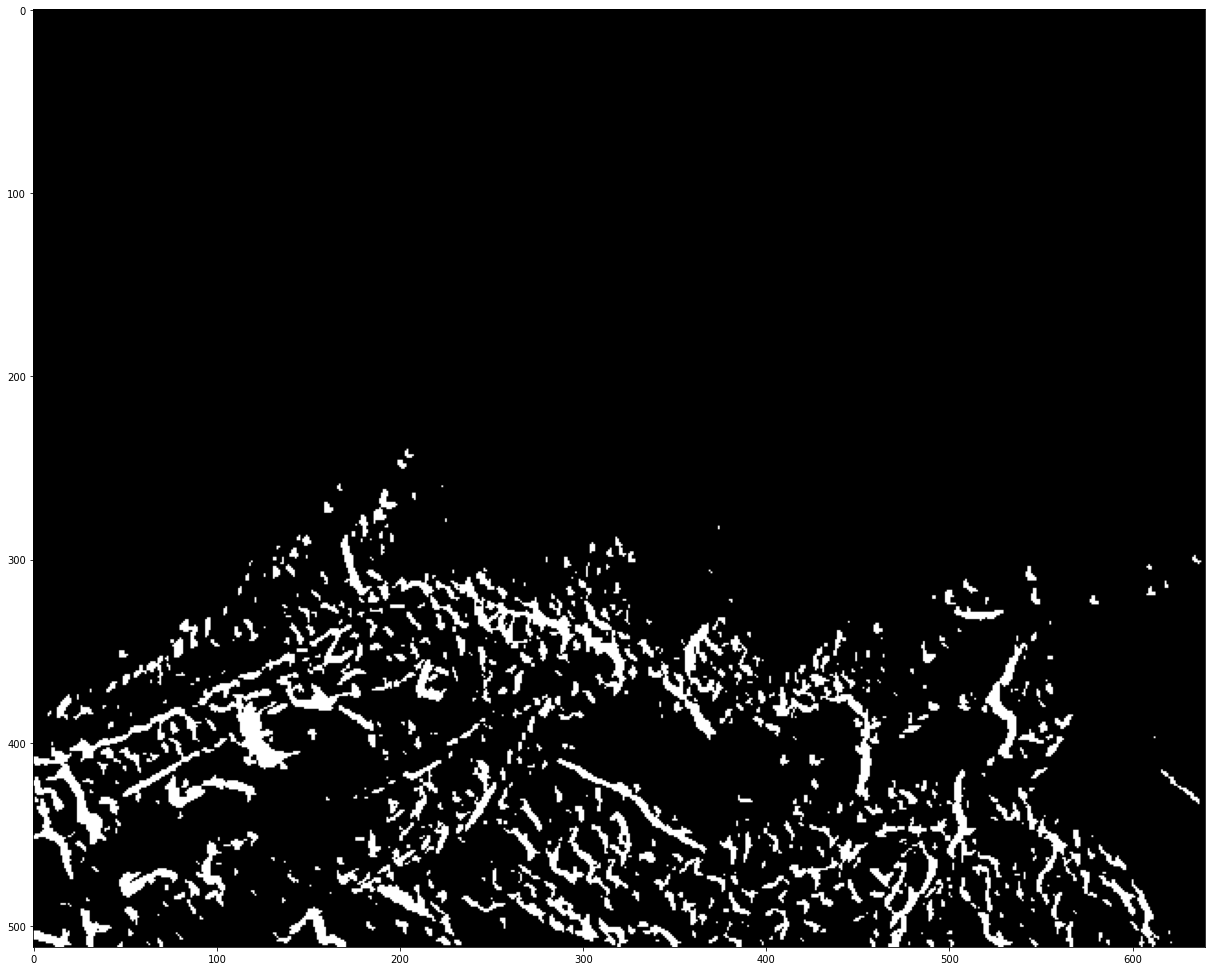

In [147]:
plt.figure(figsize=(21,21))
plt.imshow(img_thresh, cmap='gray')